In [1]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener

In [2]:
### storing my credentials in a separate python file
### consumer_key, consumer_secret,access_token, access_token_secret
from credentials import *
import sentiment_mod as s
import json

In [ ]:
class listener(StreamListener):

    def on_data(self, data):
        try:
            tweets_data = open("twitter-data.txt","a")
            tweets_data.write(data)
            #output.write('\n')
            tweets_data.close()
            return True
        except BaseException as e:
            print("failed ondata,", str(e))
            time.sleep(5)

            def on_error(self, status):
        print(status)

if __name__ == '__main__':        
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)

    # Initiate the connection to Twitter Streaming API
    twitterStream = Stream(auth, listener())
    twitterStream.filter(languages=["en"],track=["Musk"])

In [3]:
tweets_data = []
tweets_file = open("twitter-data.txt", "r")

In [4]:
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [6]:
def classify_tweets(tweet):
    sentiment_value, confidence = s.sentiment(tweet)
    #print(tweet, sentiment_value, confidence)
    if confidence*100 >= 80:
        return sentiment_value

In [7]:
tweets = pd.DataFrame()
# access tweet
tweets['text'] =list(map(lambda tweet: tweet['text'], tweets_data))
# calculate sentiment
tweets['sentiment'] =list(map(lambda tweet: classify_tweets(tweet['text']), tweets_data))

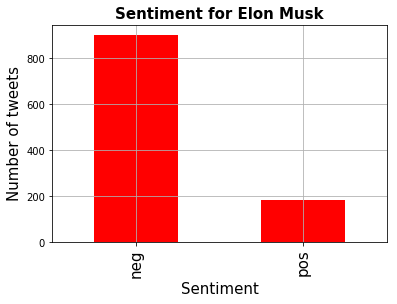

In [17]:
tweets_by_sentiment = tweets['sentiment'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Sentiment', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Sentiment for Elon Musk', fontsize=15, fontweight='bold')
tweets_by_sentiment.plot(ax=ax, kind='bar', color='red')
plt.grid()
